# RandomForest but with Rule (AQ algorithm)

Sample datasets are in the `example_data` folder

## Dataset: `exams_uma.csv`

### Loading the needed libraries

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [4]:
import numpy as np
from core.forest import Forest
from sklearn.model_selection import KFold
from sklearn import metrics
import matplotlib.pyplot as plt
from tqdm import tqdm

### Training and testing

In [ ]:
all_stats = []

mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

data = np.genfromtxt(fname="example_data/exams_uma.csv", delimiter=";", dtype=str)
X, y = data[:,:5], data[:,5:]

for _ in range(5):
    cv = KFold(n_splits=10, shuffle=True)
    for train_ix, test_ix in cv.split(X):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        forest = Forest(n_tree=20, train_x=X_train, train_y=y_train)
        score = []
        results = []
        print("Testing...")
        for test_x in tqdm(X_test):
            result, prec = forest.predict(test_x)
            results.append(result.tolist())
            score.append(prec)

        test_y = y_test

        fpr, tpr, _ = metrics.roc_curve(test_y, score, pos_label=['1'])

        stats = {}
        stats["acc"] = metrics.accuracy_score(test_y, results)
        stats["precision"] = metrics.precision_score(test_y, results, labels=['1'], average='micro')
        stats["recall"] = metrics.recall_score(test_y, results, labels=['1'], average='micro')
        stats["f1_score"] = metrics.f1_score(test_y, results, labels=['1'], average='micro')
        stats["auc"] = metrics.auc(fpr, tpr)
        stats["fpr"] = fpr
        stats["tpr"] = tpr
        stats["cm"] = metrics.confusion_matrix(test_y,results)


        interp_tpr = np.interp(mean_fpr, stats["fpr"], stats["tpr"])
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(stats["auc"])

        all_stats.append(stats)

In [3]:
def stats(dict_list, key):
    list = [el[key] for el in dict_list]
    np_list = np.array(list)
    return np.mean(np_list), np.std(np_list)

def get_min_and_max(dict_list, key):
    list = [el[key] for el in dict_list]
    return list.index(min(list)), list.index(max(list))


### Result

In [4]:
#mean and std for acc
stats(all_stats, "acc")

(0.6844, 0.041912289367201115)

In [5]:
#mean and std for precision
stats(all_stats, "precision")

(0.7650822178285596, 0.05233546334755526)

In [6]:
#mean and std for f1_score
stats(all_stats, "f1_score")

(0.7904710302548145, 0.03282802018770239)

In [7]:
#worst and best index by acc and auc
min_v_acc, max_v_acc = get_min_and_max(all_stats, "acc")
min_v_auc, max_v_auc = get_min_and_max(all_stats, "auc")

### Worst and best acc

In [8]:
all_stats[min_v_acc]

{'acc': 0.57,
 'precision': 0.6708860759493671,
 'recall': 0.7571428571428571,
 'f1_score': 0.7114093959731544,
 'auc': 0.5426190476190476,
 'fpr': array([0.        , 0.06666667, 0.2       , 0.3       , 0.3       ,
        0.43333333, 0.63333333, 0.7       , 0.76666667, 0.83333333,
        1.        , 1.        ]),
 'tpr': array([0.        , 0.21428571, 0.24285714, 0.32857143, 0.38571429,
        0.5       , 0.65714286, 0.75714286, 0.78571429, 0.84285714,
        0.94285714, 1.        ]),
 'cm': array([[ 4, 26],
        [17, 53]], dtype=int64)}

In [9]:
all_stats[max_v_acc]

{'acc': 0.77,
 'precision': 0.8024691358024691,
 'recall': 0.9027777777777778,
 'f1_score': 0.8496732026143791,
 'auc': 0.6800595238095237,
 'fpr': array([0.        , 0.03571429, 0.03571429, 0.10714286, 0.28571429,
        0.42857143, 0.53571429, 0.67857143, 0.71428571, 0.71428571,
        0.75      , 1.        ]),
 'tpr': array([0.        , 0.20833333, 0.34722222, 0.40277778, 0.48611111,
        0.625     , 0.69444444, 0.81944444, 0.91666667, 0.95833333,
        0.97222222, 1.        ]),
 'cm': array([[12, 16],
        [ 7, 65]], dtype=int64)}

### Worst and best auc

In [10]:
all_stats[min_v_auc]

{'acc': 0.7,
 'precision': 0.775,
 'recall': 0.8378378378378378,
 'f1_score': 0.8051948051948051,
 'auc': 0.4779106029106029,
 'fpr': array([0.        , 0.15384615, 0.26923077, 0.34615385, 0.38461538,
        0.42307692, 0.61538462, 0.76923077, 0.84615385, 0.92307692,
        0.92307692, 1.        ]),
 'tpr': array([0.        , 0.18918919, 0.21621622, 0.25675676, 0.35135135,
        0.39189189, 0.56756757, 0.72972973, 0.83783784, 0.93243243,
        0.95945946, 1.        ]),
 'cm': array([[ 8, 18],
        [12, 62]], dtype=int64)}

In [11]:
all_stats[max_v_auc]

{'acc': 0.76,
 'precision': 0.85,
 'recall': 0.85,
 'f1_score': 0.85,
 'auc': 0.711875,
 'fpr': array([0.  , 0.1 , 0.15, 0.15, 0.2 , 0.2 , 0.35, 0.35, 0.45, 0.75, 1.  ]),
 'tpr': array([0.    , 0.225 , 0.2875, 0.4125, 0.4375, 0.55  , 0.575 , 0.6375,
        0.8375, 0.9375, 1.    ]),
 'cm': array([[ 8, 12],
        [12, 68]], dtype=int64)}

### ROC curve for worst and best result

### ACC

<Figure size 432x288 with 0 Axes>

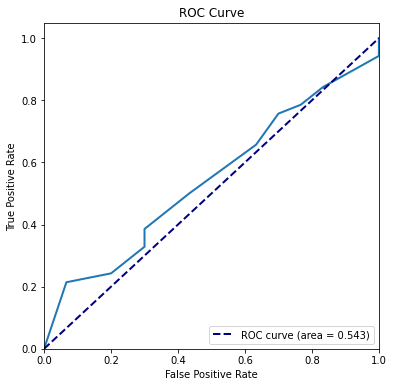

In [12]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[min_v_acc]["fpr"], all_stats[min_v_acc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[min_v_acc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

<Figure size 432x288 with 0 Axes>

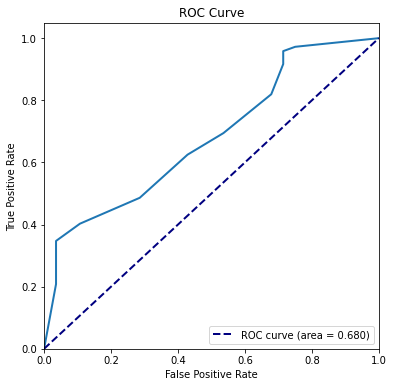

In [13]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[max_v_acc]["fpr"], all_stats[max_v_acc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[max_v_acc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

### AUC

<Figure size 432x288 with 0 Axes>

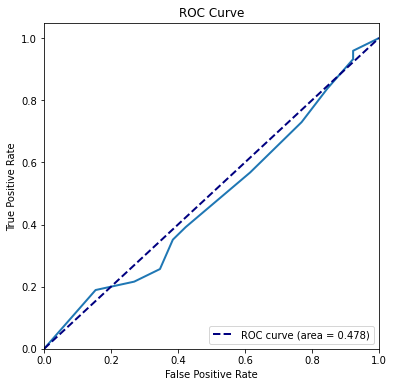

In [14]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[min_v_auc]["fpr"], all_stats[min_v_auc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[min_v_auc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

<Figure size 432x288 with 0 Axes>

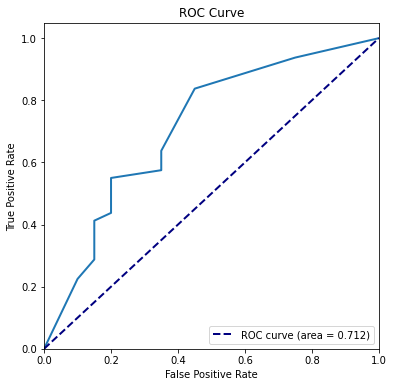

In [15]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[max_v_auc]["fpr"], all_stats[max_v_auc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[max_v_auc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

### Mean

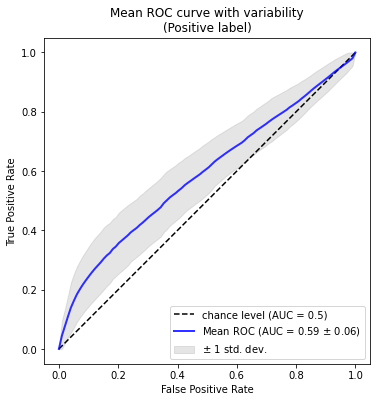

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label)",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

### Confusion Matrix for worst and best

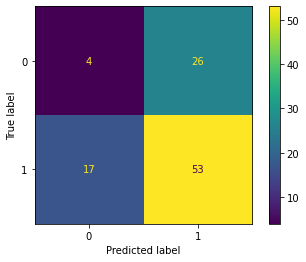

In [17]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[min_v_acc]["cm"])
pcm.plot()
plt.show()

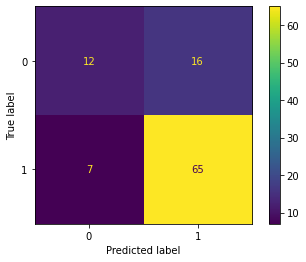

In [18]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[max_v_acc]["cm"])
pcm.plot()
plt.show()

### Compare with classic RandomForest

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

ohe = OneHotEncoder()
all_stats = []

data = np.genfromtxt(fname="example_data/exams_uma.csv", delimiter=";", dtype=str)
X = ohe.fit_transform(data[:,:5])
y = np.array([1 if x == "1" else 0 for x in data[:,5:]])

for _ in range(5):
    cv = KFold(n_splits=10, shuffle=True)
    for train_ix, test_ix in cv.split(X):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        rf=RandomForestClassifier(n_estimators=100)
        rf.fit(X_train,y_train)


        results=rf.predict(X_test)

        test_y = y_test


        stats = {}
        stats["acc"] = metrics.accuracy_score(test_y, results)
        stats["precision"] = metrics.precision_score(test_y, results, average='micro')
        stats["recall"] = metrics.recall_score(test_y, results, average='micro')
        stats["f1_score"] = metrics.f1_score(test_y, results, average='micro')
        stats["cm"] = metrics.confusion_matrix(test_y,results)

        all_stats.append(stats)

In [6]:
def stats(dict_list, key):
    list = [el[key] for el in dict_list]
    np_list = np.array(list)
    return np.mean(np_list), np.std(np_list)

def get_min_and_max(dict_list, key):
    list = [el[key] for el in dict_list]
    return list.index(min(list)), list.index(max(list))

In [7]:
stats(all_stats, "acc")

(0.7028, 0.040449474656662716)

In [8]:
stats(all_stats, "precision")

(0.7028, 0.040449474656662716)

In [9]:
stats(all_stats, "recall")

(0.7028, 0.040449474656662716)

In [10]:
stats(all_stats, "f1_score")

(0.7028, 0.0404494746566627)

In [11]:
min_v_acc, max_v_acc = get_min_and_max(all_stats, "acc")

In [12]:
all_stats[min_v_acc]

{'acc': 0.62,
 'precision': 0.62,
 'recall': 0.62,
 'f1_score': 0.62,
 'cm': array([[ 5, 25],
        [13, 57]], dtype=int64)}

In [13]:
all_stats[max_v_acc]

{'acc': 0.81,
 'precision': 0.81,
 'recall': 0.81,
 'f1_score': 0.81,
 'cm': array([[11, 14],
        [ 5, 70]], dtype=int64)}

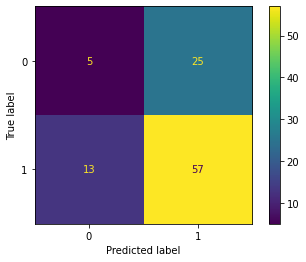

In [14]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[min_v_acc]["cm"])
pcm.plot()
plt.show()

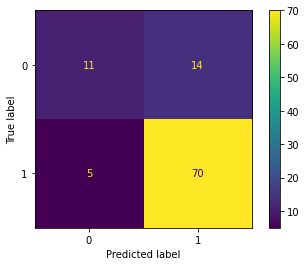

In [15]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[max_v_acc]["cm"])
pcm.plot()
plt.show()